In [1]:
import pandas as pd
from pymatgen.core import Element, Composition
import numpy as np

orig_data = pd.read_csv("data.csv", na_filter=False)
orig_data.head()

,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure
0,mp-1007923,CrNi3,-0.016354,0.000802,0.0,False
1,mp-1008754,TbHg2,-0.069428,0.329909,0.0,True
2,mp-1016886,MgVO3,-2.241438,0.545977,0.0,True
3,mp-1018902,PrSbPt,-1.111238,0.000000,0.0,True
4,mp-1020595,Rb8PO3,-0.772860,0.491666,0.0,True


In [2]:
orig_data['elements'] = [Composition(c) for c in orig_data['formula']]
orig_data.head()

,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure,elements
0,mp-1007923,CrNi3,-0.016354,0.000802,0.0,False,"(Cr, Ni)"
1,mp-1008754,TbHg2,-0.069428,0.329909,0.0,True,"(Tb, Hg)"
2,mp-1016886,MgVO3,-2.241438,0.545977,0.0,True,"(Mg, V, O)"
3,mp-1018902,PrSbPt,-1.111238,0.000000,0.0,True,"(Pr, Sb, Pt)"
4,mp-1020595,Rb8PO3,-0.772860,0.491666,0.0,True,"(Rb, P, O)"


In [3]:
# Q1.1
from itertools import chain

all_ele = set(chain.from_iterable(orig_data['elements']))
print("There are", len(all_ele), "elements.")

There are 89 elements.


In [4]:
# Q1.2
num_ele = [len(l) for l in orig_data['elements']]
max_els = max(num_ele)
max_els

9

In [5]:
from collections import Counter
count_ele = dict(Counter(num_ele))

x_ax = list(count_ele.keys())
y_ax = list(count_ele.values())

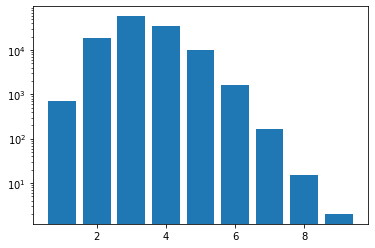

In [6]:
# Q1.3
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(x_ax, y_ax)
plt.yscale('log')

In [7]:
# Q1.4
el_count = Counter(chain(*orig_data['elements']))
sort_count = sorted(el_count.items(), key = lambda kv:(kv[1], kv[0]))
print("Top 10 most common are", list(reversed(sort_count[-10:])))
print("Top 10 least common are", sort_count[0:10])

Top 10 most common are [(Element O, 60428), (Element Li, 18580), (Element P, 13321), (Element Mn, 11233), (Element S, 10516), (Element Fe, 10109), (Element N, 9723), (Element F, 9606), (Element Si, 8940), (Element Mg, 8711)]
Top 10 least common are [(Element Ne, 1), (Element Ar, 2), (Element He, 8), (Element Kr, 15), (Element Xe, 147), (Element Pa, 253), (Element Ac, 297), (Element Np, 340), (Element Pu, 388), (Element Pm, 515)]


In [8]:
element_table = [Element.from_Z(c) for c in range (1, 112)]
noble = [c for c in element_table if c.is_noble_gas]
noble

[Element He, Element Ne, Element Ar, Element Kr, Element Xe, Element Rn]

In [9]:
def with_noble_gas(x):
    return any([c in noble for c in x])
without_noble_gas = [not with_noble_gas(c) for c in orig_data['elements']]

In [10]:
data = orig_data.copy()
data.count()

task_id                      124515
formula                      124515
formation_energy_per_atom    124515
e_above_hull                 124515
band_gap                     124515
has_bandstructure            124515
elements                     124515
dtype: int64

In [11]:
data = data[without_noble_gas]
data.count()

task_id                      124342
formula                      124342
formation_energy_per_atom    124342
e_above_hull                 124342
band_gap                     124342
has_bandstructure            124342
elements                     124342
dtype: int64

In [12]:
# Q2.1
n = data.shape[0]
n

124342

In [13]:
# Q2.2
element_data = pd.read_csv("element_properties.csv", index_col=0)
element_data.isna().sum()

AtomicRadius               7
AtomicVolume               2
AtomicWeight               0
BulkModulus               26
BoilingT                   2
Column                     0
CovalentRadius             0
Density                    2
ElectronAffinity           9
Electronegativity          4
FirstIonizationEnergy      1
HeatCapacityMass          10
Row                        0
phi                       22
SecondIonizationEnergy    12
ShearModulus              34
dtype: int64

In [14]:
# Q2.3
element_data.mean(skipna=True)

AtomicRadius                 1.500682
AtomicVolume              3426.442121
AtomicWeight               116.153896
BulkModulus                 90.794203
BoilingT                  2549.858065
Column                       8.315789
CovalentRadius             151.810526
Density                   7489.235725
ElectronAffinity            76.162209
Electronegativity            1.747033
FirstIonizationEnergy        8.094711
HeatCapacityMass             0.635447
Row                          4.831579
phi                          4.034247
SecondIonizationEnergy      18.947504
ShearModulus                47.362295
dtype: float64

In [15]:
element_data = element_data.fillna(element_data.mean(skipna=True))

In [16]:
# Q2.4
data['composition'] = [Composition(c).to_data_dict['unit_cell_composition'] for c in data['formula']]
data['composition']

0                                    {'Cr': 1.0, 'Ni': 3.0}
1                                    {'Tb': 1.0, 'Hg': 2.0}
2                           {'Mg': 1.0, 'V': 1.0, 'O': 3.0}
3                         {'Pr': 1.0, 'Sb': 1.0, 'Pt': 1.0}
4                           {'Rb': 8.0, 'P': 1.0, 'O': 3.0}
                                ...                        
124510                     {'Zn': 1.0, 'Mo': 2.0, 'O': 4.0}
124511                      {'Mg': 1.0, 'V': 2.0, 'O': 4.0}
124512                     {'Ca': 1.0, 'Co': 2.0, 'O': 4.0}
124513    {'Ca': 1.0, 'La': 1.0, 'Cr': 1.0, 'W': 1.0, 'O...
124514    {'Ca': 1.0, 'La': 1.0, 'Cr': 1.0, 'Sn': 1.0, '...
Name: composition, Length: 124342, dtype: object

In [17]:
def cal_ave_prop(c, prop):
    unit_cell_composition = c
    numerator = 0
    denominator = 0
    for key, value in unit_cell_composition.items():
        numerator += element_data.loc[key, prop] * value
        denominator += value
    return numerator / denominator

atomic_radius = [cal_ave_prop(c, "AtomicRadius") for c in data['composition']]
atomic_radius

[1.3625000000000003,
 1.5833333333333333,
 0.93,
 1.55,
 1.8,
 1.3214285714285714,
 1.4055555555555554,
 1.1916666666666667,
 1.2166666666666666,
 1.4875,
 1.325,
 1.3,
 1.3214285714285714,
 1.08125,
 1.028125,
 1.3166666666666667,
 1.053125,
 1.0484375000000001,
 1.75,
 1.08,
 0.775,
 1.53,
 1.35,
 1.2600000000000002,
 1.3666666666666665,
 1.3285714285714287,
 1.2714285714285716,
 1.05625,
 1.1222222222222225,
 1.06,
 1.2428571428571427,
 1.4285714285714286,
 0.615,
 1.525,
 1.41,
 1.0,
 1.1833333333333333,
 1.5499999999999998,
 1.055,
 1.5374999999999999,
 1.47,
 1.4666666666666668,
 1.8375,
 1.5375,
 1.375,
 1.4833333333333334,
 1.59,
 1.375,
 1.825,
 1.7125,
 0.475,
 1.9125,
 1.0515873015873016,
 1.8499999999999999,
 0.8833333333333334,
 1.46875,
 0.8249999999999998,
 0.875,
 1.0538461538461539,
 1.34,
 0.5277777777777778,
 1.645,
 1.28,
 1.0950000000000002,
 1.5899999999999999,
 1.685,
 1.365,
 1.0642857142857143,
 1.0214285714285716,
 0.785,
 0.8974358974358975,
 1.01,
 1.0125,
 

In [18]:
{'Cr', 'Ni'}
element_data.loc[{'Cr', 'Ni'}, "AtomicRadius"]

Ni    1.35
Cr    1.40
Name: AtomicRadius, dtype: float64

In [19]:
# Q2.5
prop_title = element_data.columns
average_properties = []
for prop in prop_title:
    average_properties.append([cal_ave_prop(c, prop) for c in data['composition']])

In [20]:
average_properties = np.array(average_properties).T
average_properties.shape

(124342, 16)

In [21]:
# Q2.6
def find_max(c, prop):
    unit_cell_composition = c
    result = np.max([element_data.loc[i, prop] for i in unit_cell_composition])
    return result

def find_min(c, prop):
    unit_cell_composition = c
    result = np.min([element_data.loc[i, prop] for i in unit_cell_composition])
    return result

In [22]:
max_properties = []
min_properties = []
for prop in prop_title:
    max_properties.append([find_max(c, prop) for c in data['composition']])
for prop in prop_title:
    min_properties.append([find_min(c, prop) for c in data['composition']])
max_properties = np.array(max_properties).T
min_properties = np.array(min_properties).T

In [23]:
# Q2.7
design_matrix = np.concatenate([average_properties, max_properties, min_properties], axis = 1)
design_matrix.shape

(124342, 48)

In [24]:
targets = data[['band_gap', 'formation_energy_per_atom','e_above_hull']]

In [25]:
# Q3.1
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(design_matrix, targets, test_size = 0.1, random_state = 42)

In [26]:
test_y

,band_gap,formation_energy_per_atom,e_above_hull
59446,0.8516,-2.430413,0.088052
118813,0.3605,-2.032983,0.000000
23653,0.0000,0.093936,0.093936
110897,0.0000,-0.802749,0.018148
46895,3.2861,-3.916178,0.000000
...,...,...,...
86201,1.9650,-1.094328,0.000000
85858,1.0662,-0.701797,0.212761
29953,0.1019,-1.854085,0.108292
116114,4.5428,0.098545,0.132486


In [27]:
train_X_mean = np.mean(train_X, axis=0)
train_X_std = np.std(train_X, axis=0)

In [28]:
# Q3.2
norm_train_X = (train_X - train_X_mean) / train_X_std
norm_test_X = (test_X - train_X_mean) / train_X_std

In [29]:
# Q3.3
from sklearn import linear_model
mlr = linear_model.LinearRegression()

mlr.fit(norm_train_X, train_y[['formation_energy_per_atom']].values)
pred_train_y = mlr.predict(norm_train_X)
pred_test_y = mlr.predict(norm_test_X)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(pred_test_y, test_y[['formation_energy_per_atom']].values)
rmse = mean_squared_error(pred_test_y, test_y[['formation_energy_per_atom']].values, squared=False)

print("MAE =", '%.3f' % mae, "eV \nRMSE =", '%.3f' % rmse, "eV")

MAE = 0.397 eV 
RMSE = 0.579 eV


In [31]:
# Q3.4
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.1)
ridge.fit(norm_train_X, train_y[['formation_energy_per_atom']].values)
r_pred_train_y = ridge.predict(norm_train_X)
r_pred_test_y = ridge.predict(norm_test_X)

ridge_mae = mean_absolute_error(r_pred_test_y, test_y[['formation_energy_per_atom']].values)
ridge_rmse = mean_squared_error(r_pred_test_y, test_y[['formation_energy_per_atom']].values, squared=False)

print("MAE =", '%.3f' % ridge_mae, "eV \nRMSE =", '%.3f' % ridge_rmse, "eV")

MAE = 0.397 eV 
RMSE = 0.579 eV


In [32]:
lasso = Lasso(alpha = 0.1)
lasso.fit(norm_train_X, train_y[['formation_energy_per_atom']].values)
l_pred_train_y = lasso.predict(norm_train_X)
l_pred_test_y = lasso.predict(norm_test_X)

l_mae = mean_absolute_error(l_pred_test_y, test_y[['formation_energy_per_atom']].values)
l_rmse = mean_squared_error(l_pred_test_y, test_y[['formation_energy_per_atom']].values, squared=False)

print("MAE =", '%.3f' % l_mae, "eV \nRMSE =", '%.3f' % l_rmse, "eV")

MAE = 0.466 eV 
RMSE = 0.669 eV


In [33]:
# Q3.5
train_y_bg = train_y['band_gap'] < 0.001
test_y_bg = test_y['band_gap'] < 0.001

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(norm_train_X, train_y_bg)
lda_acc = lda.score(norm_test_X, test_y_bg)
print("LDA accuracy is", '%.3f' % lda_acc)

LDA accuracy is 0.787


In [35]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(norm_train_X, train_y_bg)
qda_acc = qda.score(norm_test_X, test_y_bg)
print("QDA accuracy is", '%.3f' % qda_acc)

QDA accuracy is 0.785


In [36]:
from sklearn.linear_model import LogisticRegression

logir = LogisticRegression(penalty='none', solver='lbfgs', max_iter=500)
logir.fit(norm_train_X, train_y_bg)
lgir_acc = logir.score(norm_test_X, test_y_bg)
print("LogisticRegression accuracy is", '%.3f' % lgir_acc)

LogisticRegression accuracy is 0.792


In [37]:
# Q3.6
# Doing prediction only on the composition or chemical formula, does not take materials with different crystal strucutres 
# but same compositon into account, that is the effect of polymorphs. 

In [38]:
# Q4.1
from matplotlib import image

catalyst = image.imread('catalyst.png')
catalyst.shape

(200, 200)

In [39]:
count = catalyst.ravel()
count.shape
count

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

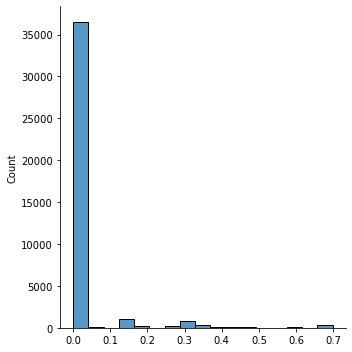

In [40]:
# Q4.2
sns.displot(count)

In [41]:
# Q4.3
from sklearn.cluster import KMeans

data_c = count.reshape(-1, 1)
kmeans = KMeans(3).fit(data_c)
labels = kmeans.labels_

In [42]:
cnt = Counter(labels)
cnt

Counter({0: 37262, 2: 2200, 1: 538})

In [43]:
rank = sorted(cnt, key=cnt.get, reverse=True)
rank

[0, 2, 1]

In [44]:
mapping = dict(zip(rank, range(3)))
mapping

{0: 0, 2: 1, 1: 2}

In [45]:
mapping_labels = [mapping[i] for i in labels]

In [46]:
mapping_labels_1 = np.array(mapping_labels)

In [47]:
mapping_labels_2 = mapping_labels_1.reshape(catalyst.shape)

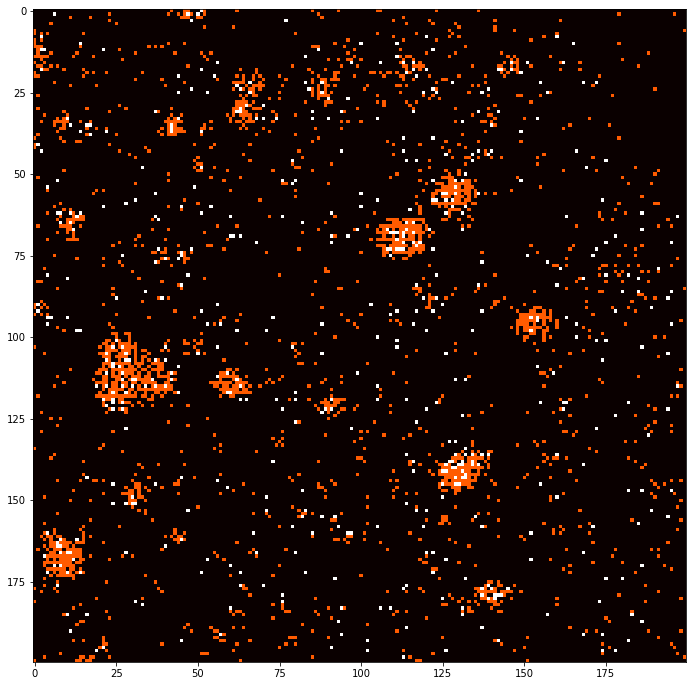

In [48]:
f, ax = plt.subplots(figsize = (12, 12))
plt.imshow(mapping_labels_2, cmap = 'hot')

In [49]:
# Q4.4
# Elbow method
coordinates = np.array(np.nonzero(catalyst)).T

In [50]:
md = []
for i in range(1,31):
    kmeans_n = KMeans(i).fit(coordinates)
    o = kmeans_n.inertia_
    md.append(o)

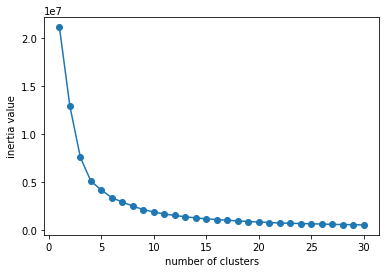

In [51]:
plt.plot(list(np.arange(1,31)), md, marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('inertia value')
plt.show()

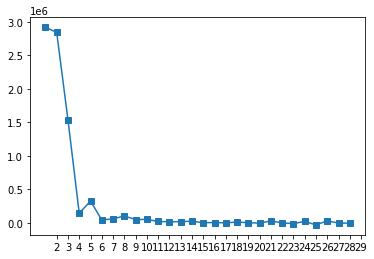

In [52]:
# Second derivative
x = list(np.arange(1,31))
y = md
dx = x[1] - x[0]
dxdx = dx**2

df = np.diff(y) / dx

ddf = np.diff(y, 2) / dxdx

plt.figure()
plt.plot(x[:-2], ddf, label='np.diff, 2', marker = 's')
tick = plt.xticks(x[1:-1])

In [53]:
A1, A2 = np.split(coordinates, [1], axis=1)

In [54]:
new_A2 = np.flip(A2)

In [55]:
X = np.concatenate((new_A2, A1), axis=1)

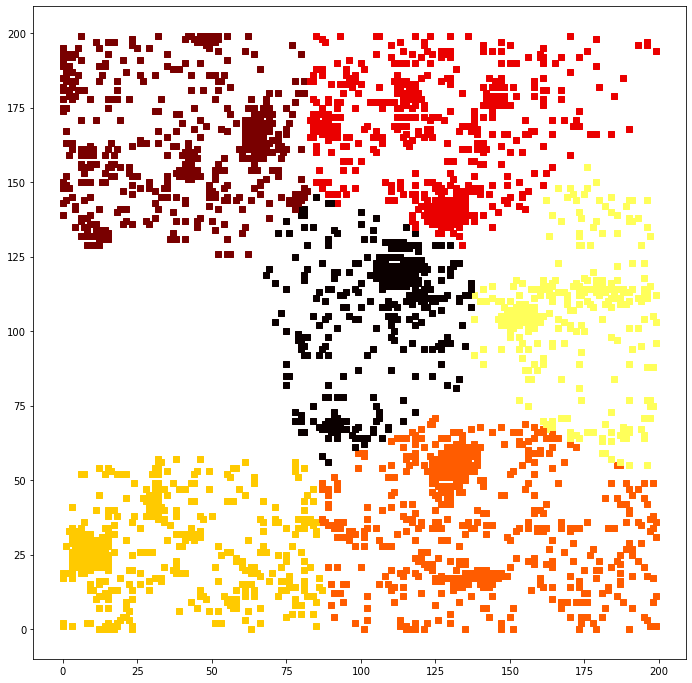

In [56]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)
f, ax = plt.subplots(figsize = (12, 12))
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap = 'hot', marker = "s")
plt.gca().set_aspect('equal', adjustable = 'box')

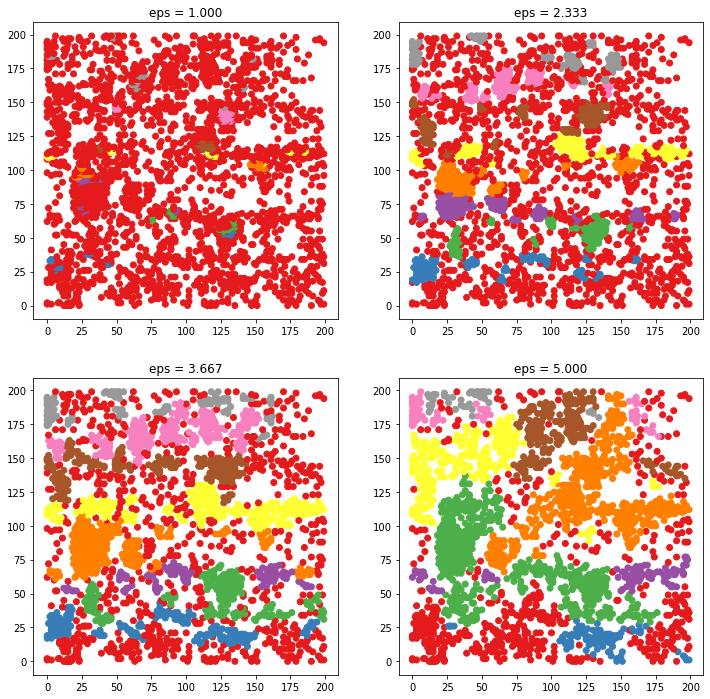

In [57]:
# Q4.5
from sklearn.cluster import DBSCAN

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, eps in enumerate(np.linspace(1, 5, 4)):
    clustering = DBSCAN(eps=eps).fit(X)
    a = ax[0 if i < 2 else 1, i % 2]
    a.scatter(X[:, 0], X[:, 1], c = clustering.labels_, cmap = 'Set1')
    a.set_title("eps = %.3f" % eps)

Text(0, 0.5, 'EPS')

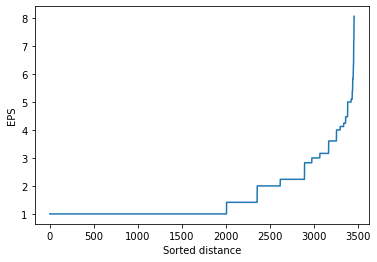

In [58]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(coordinates)
distances, indices = neighbors_fit.kneighbors(coordinates)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Sorted distance')
plt.ylabel('EPS')

In [59]:
num_cluster = []
for eps in np.linspace(0.1, 10, 100):
    db = DBSCAN(eps = eps).fit(coordinates)
    num_cluster.append(len(set(db.labels_)))

Text(0, 0.5, 'Number of clusters')

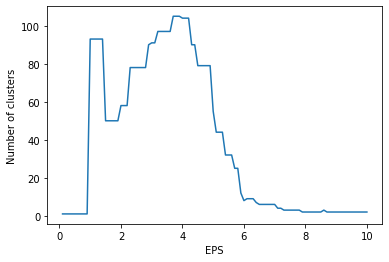

In [60]:
plt.plot(np.linspace(0.1, 10, 100), num_cluster)
plt.xlabel('EPS')
plt.ylabel('Number of clusters')

In [61]:
# Need to strike balance b/t number of clusters and eps, so choosing EPS = 2

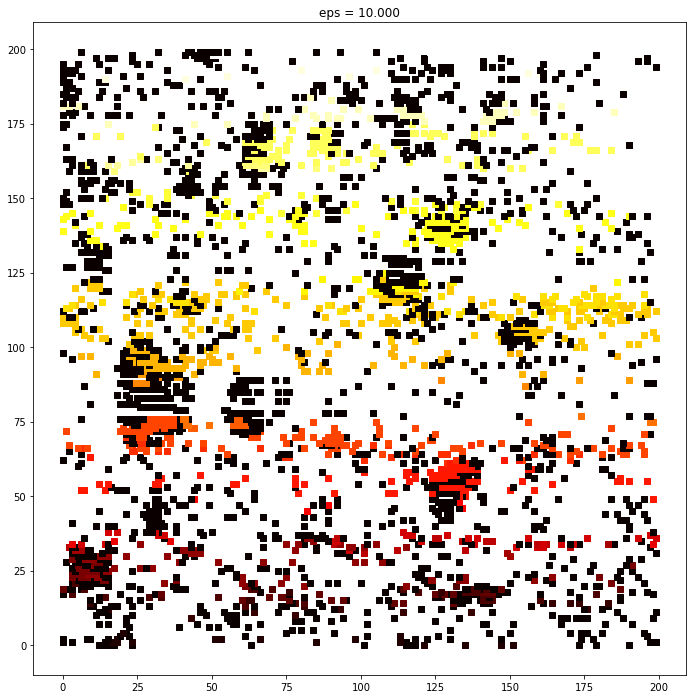

In [62]:
clustering = DBSCAN(eps = 2, min_samples = 7).fit(coordinates)
f, ax = plt.subplots(figsize = (12, 12))
plt.scatter(X[:, 0], X[:, 1], c = clustering.labels_, cmap = 'hot', marker = "s")
plt.title("eps = %.3f" % eps)
plt.gca().set_aspect('equal', adjustable = 'box')

In [63]:
# Q4.6
# The kmeans clustering is based on distances between data, find centers and cluster points to it. Result is highly depend
# on the chosen K-value (# of clustering)
# The DBSCAN is based on density of points (dense regions seperate by sparse region)
# it works well with non-globular structure data